# 비지도 학습과 데이터 전처리
# Unsupervised Learning and Preprocessing

## 1. Types of unsupervised learning

### 1) unsupervised transformation(비지도 변환)
* 데이터를 새롭게 표현하여 원래의 데이터보다 쉽게 해석할 수 있도록 만드는 알고리즘
* 특성(Feature)들이 많은 고차원 데이터를 feature들을 줄이면서 저차원으로 축소하는 방법인 **차원 축소**(dimensionality reduction)가 있음
* 차원 축소의 대표적인 예는 시각화를 위해 데이터셋을 2차원으로 변경하는 경우

### 2) Clustering (군집)
* 데이터를 비슷한 것끼리 그룹으로 묶는 방법

### 3) 그 외
* 데이터에 대한 이해가 필요할 때 비지도 학습 알고리즘을 사용하기도 함 (**EDA** 단계)
* 또한 supervised learning의 전처리 단계에서도 비지도 학습니 사용됨 >> 정확도 높일 수 있고, 메모리 및 시간을 절약할 수 있음

## 2. Preprocessing and Scaling (데이터 전처리와 스케일링)

In [1]:
import mglearn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

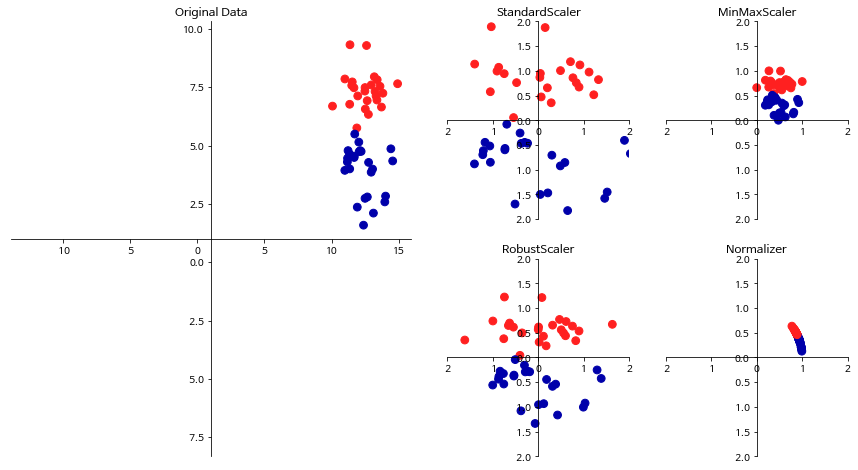

In [2]:
mglearn.plots.plot_scaling()

## 2.1 여러 가지 전처리 방법

### 1) sklearn.preprocessing.[StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

* 각 특성(feature)의 평균을 0 ($\mu = 0$), 분산을 1 ($\sigma^2 = 1$)인 **표준 정규분포** $N(\mu, \sigma^2) = N(0, 1)$로 변경하여 모든 특성이 같은 크기를 가지게 함
* `StandardScaler`를 구하는 공식은 다음과 같으며, **Z-Score**라고 함

$$ z=\cfrac { data\quad point\quad -\quad mean }{ standard\quad deviation } =\cfrac { x-\mu  }{ \sigma  }   $$

* `StandardScalere`는 특성의 최소값(min)과 최대값(max) 크기를 제한하지는 않음

In [9]:
from sklearn.preprocessing import StandardScaler

data = [[0, 0], [0, 0], [1, 1], [1, 1]]
scaler = StandardScaler()
print(scaler.fit(data))
print('mean = ', scaler.mean_)
print('variance = ', scaler.var_)
print('z-score = \n', scaler.transform(data))
print('[2, 2] transformation result = ',scaler.transform([[2, 2]]))

StandardScaler(copy=True, with_mean=True, with_std=True)
mean =  [ 0.5  0.5]
variance =  [ 0.25  0.25]
z-score = 
 [[-1. -1.]
 [-1. -1.]
 [ 1.  1.]
 [ 1.  1.]]
[2, 2] transformation result =  [[ 3.  3.]]


### 2) sklearn.preprocessing.[RobustScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html#sklearn.preprocessing.RobustScaler)

* 특성들이 같은 스케일을 갖게 한다는 통계적 측면에서는 `StandardScaler`와 비슷함
* 하지만, 평균과 분산 대신 중간값(median)과 사분위 값(quartile)을 사용함
    * **1사분위**(1st quartile, 25th quantile) 값은 $x$보다 작은 수가 전체 개수의 $\cfrac { 1 }{ 4 } $인 $x$이고, **3사분위**(3rd quartile, 75th quantile)는 $x$보다 작은 수가 전체 개수의 $\cfrac { 3 }{ 4 }$인 $x$를 말함

* `RobustScaler`는 **outliers**(이상치)에 영향을 받지 않음 [여기 참고](http://scikit-learn.org/stable/modules/preprocessing.html#scaling-data-with-outliers)
* `RobustScaler`를 구하는 공식은 다음과 같음 (Q<sub>2</sub>=median, Q<sub>1</sub>, Q<sub>3</sub>=1, 3 사분위 값) 

$$ \cfrac { x-{ Q }_{ 2 } }{ { Q }_{ 3 }-{ Q }_{ 1 } }  $$

* scikit-learn에는 `RobustScaler`의 한 종류인 **[QuantileTransformer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html#sklearn.preprocessing.QuantileTransformer)** 가 있음

In [12]:
import numpy as np
from sklearn.preprocessing import QuantileTransformer
rng = np.random.RandomState(0)
X = np.sort(rng.normal(loc=0.5, scale=0.25, size=(25, 1)), axis=0)
qt = QuantileTransformer(n_quantiles=4, random_state=0)
qt.fit_transform(X) 

array([[  9.99999998e-08],
       [  1.94746314e-01],
       [  2.09970714e-01],
       [  2.23804521e-01],
       [  2.90174575e-01],
       [  2.96823987e-01],
       [  3.02773531e-01],
       [  3.30568746e-01],
       [  3.33333333e-01],
       [  4.11542597e-01],
       [  4.21077502e-01],
       [  4.51839838e-01],
       [  4.56671136e-01],
       [  4.72063081e-01],
       [  5.69119119e-01],
       [  6.18823093e-01],
       [  6.66666667e-01],
       [  6.86982873e-01],
       [  6.93778383e-01],
       [  8.06572636e-01],
       [  8.16014284e-01],
       [  8.80050369e-01],
       [  9.04601304e-01],
       [  9.93154238e-01],
       [  9.99999900e-01]])

### 3) sklearn.preprocessing.[MinMaxScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler)

* `MinMaxScaler`는 모든 특성이 정확하게 0과 1사이에 위치하도록 데이터를 변경함

$$ \cfrac { x-{ x }_{ min } }{ { x }_{ max }-{ x }_{ min } }  $$

In [18]:
from sklearn.preprocessing import MinMaxScaler

data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
scaler = MinMaxScaler()
print(scaler.fit(data))
print("max of data = ",scaler.data_max_)
print("min of data = ",scaler.data_min_)
print("data range = ",scaler.data_range_)
print("<data scaling> \n", scaler.transform(data))
print('[2, 2] minmax scaling =',scaler.transform([[2, 2]]))

MinMaxScaler(copy=True, feature_range=(0, 1))
max of data =  [  1.  18.]
min of data =  [-1.  2.]
data range =  [  2.  16.]
<data scaling> 
 [[ 0.    0.  ]
 [ 0.25  0.25]
 [ 0.5   0.5 ]
 [ 1.    1.  ]]
[2, 2] minmax scaling = [[ 1.5  0. ]]


### 4) sklearn.preprocessing.[Normalizer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html#sklearn.preprocessing.Normalizer)

* 벡터의 유클리디언 길이가 1이 되도록 데이터 포인트를 조정함
* `StandardScaler, RobustScaler, MinMaxScaler`는 각 열(특성)의 통계치를 이용하지만, **Normalizer**는 행(데이터포인트)마다 각각 정규화가 됨
* 이러한 정규화(normalization)은 특성 벡터의 길이는 상관없고 데이터의 **방향**(또는 **각도**)만이 중요할 때 많이 사용함
> Scaling inputs to unit norms is a common operation for text classification or clustering for instance. For instance the dot product of two l2-normalized TF-IDF vectors is the cosine similarity of the vectors and is the base similarity metric for the Vector Space Model commonly used by the Information Retrieval community.

In [23]:
from sklearn.preprocessing import Normalizer

data = [[ 1., -1.,  2.],
        [ 2.,  0.,  0.],
        [ 0.,  1., -1.]]

scaler = Normalizer()
print(scaler.fit(data))
print("type of norm =", scaler.norm) # l2 = euclidian distance
print("<data scaling> \n", scaler.transform(data))
print('[-1., 1., 0.] normalize scaling =', scaler.transform([[-1.,  1., 0.]]))

Normalizer(copy=True, norm='l2')
type of norm = l2
<data scaling> 
 [[ 0.40824829 -0.40824829  0.81649658]
 [ 1.          0.          0.        ]
 [ 0.          0.70710678 -0.70710678]]
[-1., 1., 0.] normalize scaling = [[-0.70710678  0.70710678  0.        ]]


## 2.2 데이터 전처리(변환) 적용
* 위스콘신 유방암 데이터를 가지고 MinMaxScaler를 사용해 데이터를 전처리
* 전처리 후 SVM(SVC) 적용

In [24]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [40]:
# 데이터 변환
X_train_scaled = scaler.transform(X_train)
# 스케일이 조정된 후 데이터셋의 속성을 출력합니다
print("변환된 후 크기: {}".format(X_train_scaled.shape))
print("스케일 조정 전 특성별 최소값:\n {}".format(X_train.min(axis=0)))
print("스케일 조정 전 특성별 최대값:\n {}".format(X_train.max(axis=0)))
print("스케일 조정 후 특성별 최소값:\n {}".format(X_train_scaled.min(axis=0)))
print("스케일 조정 후 특성별 최대값:\n {}".format(X_train_scaled.max(axis=0)))

변환된 후 크기: (426, 30)
스케일 조정 전 특성별 최소값:
 [  6.98100000e+00   9.71000000e+00   4.37900000e+01   1.43500000e+02
   5.26300000e-02   1.93800000e-02   0.00000000e+00   0.00000000e+00
   1.06000000e-01   5.02400000e-02   1.15300000e-01   3.60200000e-01
   7.57000000e-01   6.80200000e+00   1.71300000e-03   2.25200000e-03
   0.00000000e+00   0.00000000e+00   9.53900000e-03   8.94800000e-04
   7.93000000e+00   1.20200000e+01   5.04100000e+01   1.85200000e+02
   7.11700000e-02   2.72900000e-02   0.00000000e+00   0.00000000e+00
   1.56600000e-01   5.52100000e-02]
스케일 조정 전 특성별 최대값:
 [  2.81100000e+01   3.92800000e+01   1.88500000e+02   2.50100000e+03
   1.63400000e-01   2.86700000e-01   4.26800000e-01   2.01200000e-01
   3.04000000e-01   9.57500000e-02   2.87300000e+00   4.88500000e+00
   2.19800000e+01   5.42200000e+02   3.11300000e-02   1.35400000e-01
   3.96000000e-01   5.27900000e-02   6.14600000e-02   2.98400000e-02
   3.60400000e+01   4.95400000e+01   2.51200000e+02   4.25400000e+03
   2.2260

* 아래의 코드에서 확인할 수 있듯이 **테스트데이터**(X_test)에 `MinMaxScaler`를 적용할 경우 최소값과 최대값이 0과 1이 아니다.
* 그 이유는, `MinMaxScaler`를 `fit(X_train)`으로 했기 때문에 다음과 같은 식이 적용되기 때문이다. 

$$ \cfrac { {x}_{test}-{ x }_{ train\_min } }{ { x }_{ train\_max }-{ x }_{ train\_min } } $$ 

* **Train set과 Test set에 항상 같은 스케일링을 적용해줘야 한다.**

In [41]:
# 테스트 데이터 변환
X_test_scaled = scaler.transform(X_test)
# 스케일이 조정된 후 테스트 데이터의 속성을 출력합니다
print("스케일 조정 후 특성별 최소값:\n{}".format(X_test_scaled.min(axis=0)))
print("스케일 조정 후 특성별 최대값:\n{}".format(X_test_scaled.max(axis=0)))

스케일 조정 후 특성별 최소값:
[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
스케일 조정 후 특성별 최대값:
[ 0.9578778   0.81501522  0.95577362  0.89353128  0.81132075  1.21958701
  0.87956888  0.9333996   0.93232323  1.0371347   0.42669616  0.49765736
  0.44117231  0.28371044  0.48703131  0.73863671  0.76717172  0.62928585
  1.33685792  0.39057253  0.89612238  0.79317697  0.84859804  0.74488793
  0.9154725   1.13188961  1.07008547  0.92371134  1.20532319  1.63068851]


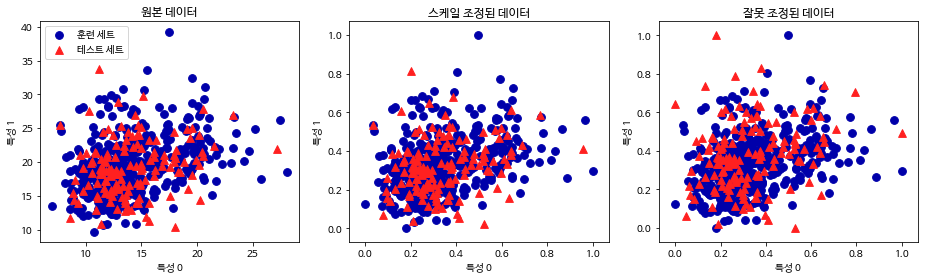

In [46]:
# 훈련 세트와 테스트 세트의 산점도를 그립니다
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1],
                c=mglearn.cm2(0), label="훈련 세트", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
                c=mglearn.cm2(1), label="테스트 세트", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("원본 데이터")

# 스케일이 조정된 데이터의 산점도를 그립니다
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2(0), label="훈련 세트", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
                c=mglearn.cm2(1), label="테스트 세트", s=60)
axes[1].set_title("스케일 조정된 데이터")

# 테스트 세트의 스케일을 따로 조정합니다
# 테스트 세트의 최솟값은 0, 최댓값은 1이 됩니다
# 이는 예제를 위한 것으로 절대로 이렇게 사용해서는 안됩니다
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# 잘못 조정된 데이터의 산점도를 그립니다
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2(0), label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],
                marker='^', c=mglearn.cm2(1), label="test set", s=60)
axes[2].set_title("잘못 조정된 데이터")

for ax in axes:
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
fig.tight_layout()

## 2.3 지도 학습에서 데이터 전처리 효과

In [50]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=0)

svm = SVC(C=100)
svm.fit(X_train, y_train)
print("테스트 세트 정확도: {:.2f}".format(svm.score(X_test, y_test)))

테스트 세트 정확도: 0.63


In [51]:
# 0~1 사이로 스케일 조정
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 조정된 데이터로 SVM 학습
svm.fit(X_train_scaled, y_train)

# 스케일 조정된 테스트 세트의 정확도
print("스케일 조정된 테스트 세트의 정확도: {:.2f}".format(svm.score(X_test_scaled, y_test)))

스케일 조정된 테스트 세트의 정확도: 0.97


In [52]:
# 평균 0, 분산 1을 갖도록 스케일 조정
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 조정된 데이터로 SVM 학습
svm.fit(X_train_scaled, y_train)

# 스케일 조정된 테스트 세트의 정확도
print("SVM test accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

SVM test accuracy: 0.96
